### Задание 1
Решите линейную систему:

In [1]:
import numpy as np

In [2]:
A = np.array([1, 2, 3, 4, 0, 6, 7, 8, 9]).reshape(3,3)
B = np.array([12, 2, 1])
print(A, end='\n\n')
print(B)

[[1 2 3]
 [4 0 6]
 [7 8 9]]

[12  2  1]


In [3]:
X = np.linalg.solve(A,B)
print(X)

[-9.2         0.9         6.46666667]


### Задание 2
Найдите псевдорешение:

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15


In [4]:
A = np.array([1, 2, -1, 3, -4, 0, 8, -5, 2, 2, 0, -5, 11, 4, -7]).reshape(5,3)
A

array([[ 1,  2, -1],
       [ 3, -4,  0],
       [ 8, -5,  2],
       [ 2,  0, -5],
       [11,  4, -7]])

In [5]:
B = np.array([1, 7, 12, 7, 15])

In [6]:
np.linalg.lstsq(A, B, rcond=-1)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [7]:
#Проверка
np.dot(A, [ 1.13919353, -0.90498444, -0.9009803 ])

array([ 0.23020495,  7.03751835, 11.83650984,  6.78328856, 15.21805317])

### Задание 3
Сколько решений имеет линейная система:


Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 


In [8]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3,3)
B = np.array([[12,2,1]])

In [9]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [10]:
C = np.concatenate((A,B.T), axis=1)

In [11]:
np.linalg.matrix_rank(A, 0.0001),np.linalg.matrix_rank(C, 0.0001)

(2, 3)

Система не имеет решений

In [12]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3,3)
B = np.array([[12,15,18]])
C = np.concatenate((A,B.T), axis=1)
np.linalg.matrix_rank(A, 0.0001),np.linalg.matrix_rank(C, 0.0001)


(2, 2)

Ранг меньше числа неизвестных, следовательно система имеет бесконечное число решений

$ \begin{pmatrix}
     1 & 2     \\
     4 & 5     \\
   \end{pmatrix}
   \begin{pmatrix}
     x     \\
     y     \\
   \end{pmatrix}
   =\begin{pmatrix}
     12-3z     \\
     15-6z     \\
   \end{pmatrix}$

$  \begin{pmatrix}
     x     \\
     y     \\
   \end{pmatrix}
   =\begin{pmatrix}
     -5/3 & 2/3     \\
     4/3 & -1/3    \\
   \end{pmatrix}
   \begin{pmatrix}
     12-3z     \\
     15-6z     \\
   \end{pmatrix}$

### Задание 4
Вычислите LU-разложение матрицы:


In [13]:
import scipy.linalg

In [14]:
A = np.array([1, 2, 3, 2, 16, 21, 4, 28, 73]).reshape(3,3)

In [15]:
A

array([[ 1,  2,  3],
       [ 2, 16, 21],
       [ 4, 28, 73]])

In [16]:
P, L, U = scipy.linalg.lu(A)

In [17]:
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [18]:
B = np.array([1, 2, 3])
B

array([1, 2, 3])

$PLUx=B$

$Ly=P^-B$

In [19]:
y = np.linalg.solve(L,np.dot(np.linalg.inv(P),B))
y

array([3.  , 0.25, 0.6 ])

$Ux=y$

In [20]:
x = np.linalg.solve(U,y)

In [21]:
x

array([ 1.01388889,  0.03472222, -0.02777778])

In [22]:
# Проверка
x = np.linalg.solve(A,B)
x

array([ 1.01388889,  0.03472222, -0.02777778])

Верно

### Задание 5 
Найдите нормальное псевдорешение недоопределенной системы:

x + 2y – z = 1

8x – 5y + 2z = 12

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 


In [23]:
import matplotlib.pyplot as plt

In [24]:
A = np.array([1, 2, -1, 8, -5, 2]).reshape(2,3)
A

array([[ 1,  2, -1],
       [ 8, -5,  2]])

In [25]:
B = np.array([1, 12])
B

array([ 1, 12])

Нормальное псевдорешение Х = (1.381918819188192 -0.18081180811808117 0.020295202952031133)


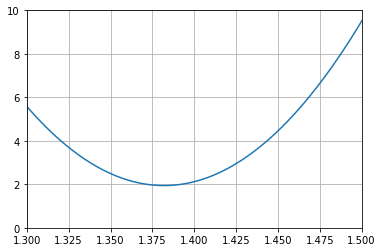

In [26]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

x = np.linspace(0, 3, 2000)
y = Q(x, 10 * x - 14, 21 * x - 29)

# d(542x**2 - 1498x + 1037)/dx = 1084x - 1498

x_1 = np.roots([1084, -1498])[0]
y_1 = 10 * x_1 - 14
z_1 = 21 * x_1 - 29

plt.plot(x, y)
plt.ylim(0,10)
plt.xlim(1.3,1.5)
plt.grid(True)
print(f'Нормальное псевдорешение Х = ({x_1} {y_1} {z_1})')

In [27]:
np.linalg.lstsq(A, B, rcond=-1)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

### Задание 6
Найдите одно из псевдорешений вырожденной системы:

Попробуйте также отыскать и нормальное псевдорешение.


In [28]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [29]:
B = np.array([2, 5, 11])
B

array([ 2,  5, 11])

In [30]:
Q, R = np.linalg.qr(A)
Q, R

(array([[-0.12309149,  0.90453403,  0.40824829],
        [-0.49236596,  0.30151134, -0.81649658],
        [-0.86164044, -0.30151134,  0.40824829]]),
 array([[-8.12403840e+00, -9.60113630e+00, -1.10782342e+01],
        [ 0.00000000e+00,  9.04534034e-01,  1.80906807e+00],
        [ 0.00000000e+00,  0.00000000e+00, -1.11164740e-15]]))

In [31]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [32]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [33]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [34]:
X = np.append(X1, 0)
print(f'X = {X}')
#np.linalg.norm(X)

X = [1.50000000e+00 9.45096256e-15 0.00000000e+00]


одно из псевдорешений

In [35]:
np.linalg.lstsq(A, B, rcond=-1)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

Как я понимаю это и есть нормальное псевдорешение